In [2]:
import pandas as pd
import pandas_datareader.data as web
from pandas.plotting import autocorrelation_plot
from pandas.tseries.offsets import MonthEnd
from pandas.plotting import scatter_matrix
from numpy import corrcoef, sum, log, arange
from numpy.random import rand
from pylab import pcolor, show, colorbar, xticks, yticks

In [3]:
import datetime

In [4]:
start= datetime.datetime(2012, 7, 31)
end = datetime.datetime(2017,6,30)
fb = web.DataReader('FB.US', 'quandl', start, end) # Facebook
mmm = web.DataReader('MMM.US', 'quandl', start, end) # 3M
ibm = web.DataReader('IBM.US', 'quandl', start, end) # IBM
amzn = web.DataReader('AMZN.US', 'quandl', start, end) # Amazon

In [5]:
month_end = pd.date_range(start='31/07/2012', end='30/06/2017', freq='BM')
month_end.values[8] = month_end[8].replace(day = 28)

In [48]:
fb_close = fb.loc[month_end, ['AdjClose']]
fb_close

,AdjClose
2012-07-31,21.7100
2012-08-31,18.0580
2012-09-28,21.6600
2012-10-31,21.1100
2012-11-30,28.0000
2012-12-31,26.6197
2013-01-31,30.9810
2013-02-28,27.2500
2013-03-28,25.5800
2013-04-30,27.7690


In [49]:
mmm_close = mmm.loc[month_end, ['AdjClose']]
mmm_close

,AdjClose
2012-07-31,80.117221
2012-08-31,81.838026
2012-09-28,81.678945
2012-10-31,77.419126
2012-11-30,80.912524
2012-12-31,82.602835
2013-01-31,89.453043
2013-02-28,93.093473
2013-03-28,95.161222
2013-04-30,93.729015


In [50]:
ibm_close = ibm.loc[month_end, ['AdjClose']]
ibm_close

,AdjClose
2012-07-31,167.112403
2012-08-31,166.858424
2012-09-28,177.648345
2012-10-31,166.584394
2012-11-30,163.488846
2012-12-31,164.761869
2013-01-31,174.670805
2013-02-28,173.474505
2013-03-28,184.245939
2013-04-30,174.951582


In [51]:
amzn_close = amzn.loc[month_end, ['AdjClose']]
amzn_close

,AdjClose
2012-07-31,233.3000
2012-08-31,248.2700
2012-09-28,254.3200
2012-10-31,232.8931
2012-11-30,252.0500
2012-12-31,250.8700
2013-01-31,265.5000
2013-02-28,264.2700
2013-03-28,266.4900
2013-04-30,253.8100


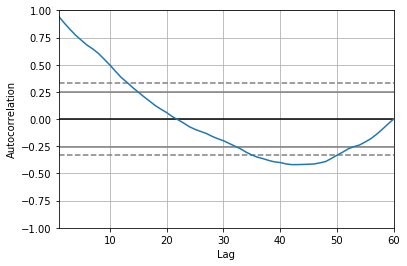

In [52]:
autocorrelation_plot(fb_close)

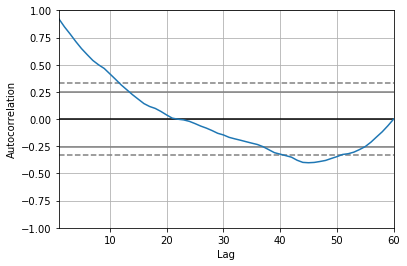

In [53]:
autocorrelation_plot(mmm_close)

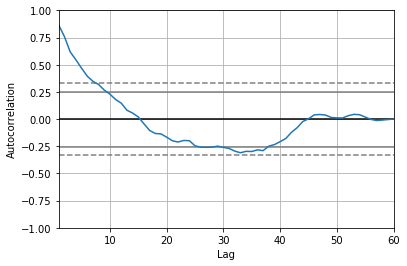

In [54]:
autocorrelation_plot(ibm_close)

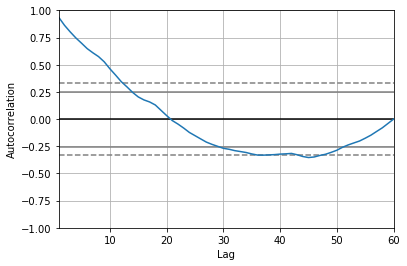

In [55]:
autocorrelation_plot(amzn_close)

According to the autocorrelation plots of the 4 stocks, we can tell that the autocorrelations are significantly different from zero when the time lags are not so large (With most stocks slightly larger than 10 and IBM slightly larger than 5).
Thus, we can conclude that the time series for each of the stocks are autocorrelated and not random. When the price of the stock rises, it tends to continue rising. When the price of the stock falls, it tends to continue falling. However, when the time lag is large, the prices are not related. A price change 20 months ago probably would not affect the price trend today.

Monthly Returns of Stocks:

In [56]:
fb_return = fb_close / fb_close.shift(1) -1 
fb_return.columns = ['fb_return']
fb_return

,fb_return
2012-07-31,NaN
2012-08-31,-0.168217
2012-09-28,0.199468
2012-10-31,-0.025392
2012-11-30,0.326386
2012-12-31,-0.049296
2013-01-31,0.163837
2013-02-28,-0.120429
2013-03-28,-0.061284
2013-04-30,0.085575


In [57]:
mmm_return = mmm_close / mmm_close.shift(1) -1
mmm_return.columns = ['mmm_return']
mmm_return

,mmm_return
2012-07-31,NaN
2012-08-31,0.021479
2012-09-28,-0.001944
2012-10-31,-0.052153
2012-11-30,0.045123
2012-12-31,0.020891
2013-01-31,0.082929
2013-02-28,0.040697
2013-03-28,0.022212
2013-04-30,-0.015050


In [58]:
ibm_return = ibm_close / ibm_close.shift(1) -1
ibm_return.columns = ['ibm_return']
ibm_return

,ibm_return
2012-07-31,NaN
2012-08-31,-0.001520
2012-09-28,0.064665
2012-10-31,-0.062280
2012-11-30,-0.018582
2012-12-31,0.007787
2013-01-31,0.060141
2013-02-28,-0.006849
2013-03-28,0.062092
2013-04-30,-0.050445


In [67]:
amzn_return = amzn_close / amzn_close.shift(1) -1
amzn_return.columns = ['amzn_return']
amzn_return

,amzn_return
2012-07-31,NaN
2012-08-31,0.064166
2012-09-28,0.024369
2012-10-31,-0.084252
2012-11-30,0.082256
2012-12-31,-0.004682
2013-01-31,0.058317
2013-02-28,-0.004633
2013-03-28,0.008400
2013-04-30,-0.047582


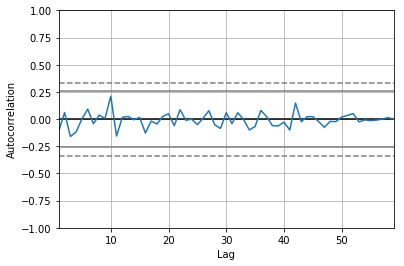

In [60]:
autocorrelation_plot(fb_return[1:])

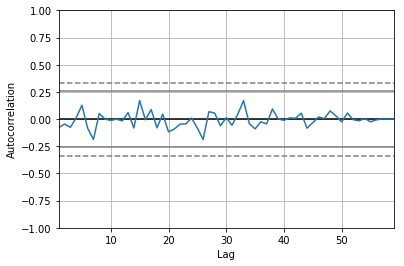

In [61]:
autocorrelation_plot(mmm_return[1:])

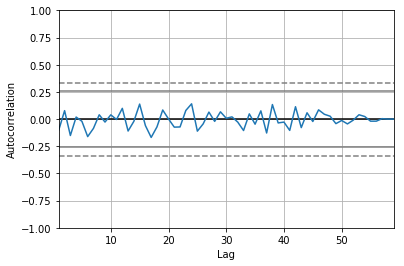

In [62]:
autocorrelation_plot(ibm_return[1:])

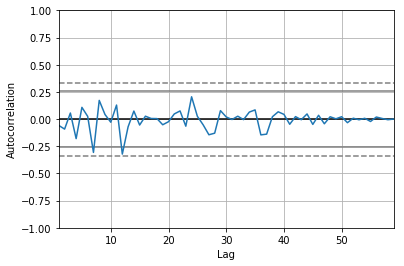

In [63]:
autocorrelation_plot(amzn_return[1:])

Unfortunately, all 4 stocks' autocorrelation plots show insignificant level of autocorrelation of the monthly returns. The indicator is not significantly different from zero.
We can conclude that monthly returns are not autocorrelated, and an increase in the monthly return does not lead to an increase in next months' return.

Scatterplot Matrix:

In [68]:
matrix = fb_return.join(mmm_return).join(ibm_return).join(amzn_return)
matrix

,fb_return,mmm_return,ibm_return,amzn_return
2012-07-31,NaN,NaN,NaN,NaN
2012-08-31,-0.168217,0.021479,-0.001520,0.064166
2012-09-28,0.199468,-0.001944,0.064665,0.024369
2012-10-31,-0.025392,-0.052153,-0.062280,-0.084252
2012-11-30,0.326386,0.045123,-0.018582,0.082256
2012-12-31,-0.049296,0.020891,0.007787,-0.004682
2013-01-31,0.163837,0.082929,0.060141,0.058317
2013-02-28,-0.120429,0.040697,-0.006849,-0.004633
2013-03-28,-0.061284,0.022212,0.062092,0.008400
2013-04-30,0.085575,-0.015050,-0.050445,-0.047582


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E025A20>,
      dtype=object)

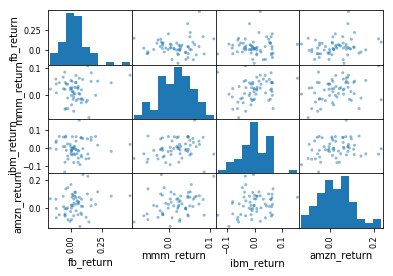

In [74]:
scatter_matrix(matrix)

There might be some weak correlations between mmm and ibm, mmm and amzn, etc. However, the correlation is not very significant.

Visualize the correlation of the returns of all pair of stocks:

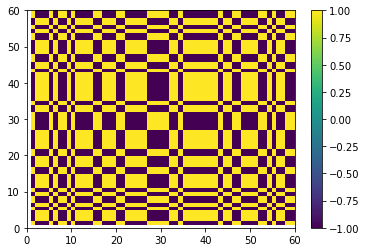

In [86]:
fb_mmm = matrix[['fb_return', 'mmm_return']]
R = corrcoef(fb_mmm)
pcolor(R)
colorbar()
yticks(arange(-1,1),range(-1,1))
xticks(arange(-1,1),range(-1,1))
show()

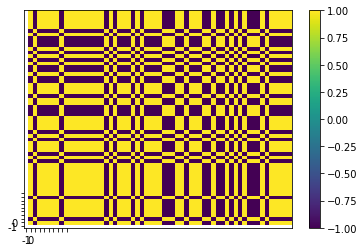

In [90]:
mmm_ibm = matrix[['mmm_return', 'ibm_return']]
R = corrcoef(mmm_ibm)
pcolor(R)
colorbar()
yticks(arange(-1,1),range(-1,1))
xticks(arange(-1,1),range(-1,1))
show()

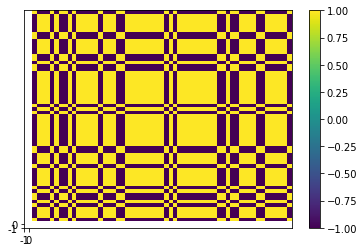

In [94]:
fb_ibm = matrix[['fb_return', 'ibm_return']]
R = corrcoef(fb_ibm)
pcolor(R)
colorbar()
yticks(arange(-1,1),range(-1,1))
xticks(arange(-1,1),range(-1,1))
show()

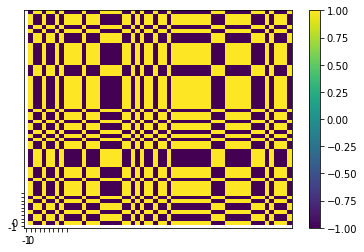

In [92]:
amzn_ibm = matrix[['amzn_return', 'ibm_return']]
R = corrcoef(amzn_ibm)
pcolor(R)
colorbar()
yticks(arange(-1,1),range(-1,1))
xticks(arange(-1,1),range(-1,1))
show()

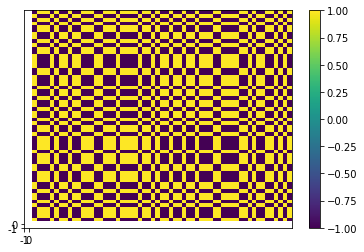

In [95]:
amzn_fb = matrix[['amzn_return', 'fb_return']]
R = corrcoef(amzn_fb)
pcolor(R)
colorbar()
yticks(arange(-1,1),range(-1,1))
xticks(arange(-1,1),range(-1,1))
show()

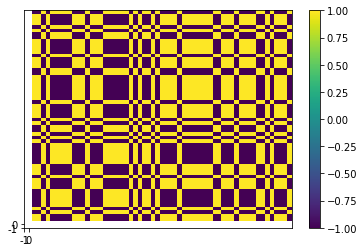

In [96]:
amzn_mmm = matrix[['amzn_return', 'mmm_return']]
R = corrcoef(amzn_mmm)
pcolor(R)
colorbar()
yticks(arange(-1,1),range(-1,1))
xticks(arange(-1,1),range(-1,1))
show()